In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import datetime
import time
from matplotlib.pyplot import figure

In [2]:
upload = pd.read_csv("output/videos_data.csv")
upload.head()
update = pd.read_csv("output/youtube2018.csv")
update.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1,2017-12-30T20:15:11.000Z,"high school musical|""disney""|""high school musi...",2993235,135820,6207,19539,False,False,False,22,Sat,12/30/2017,20:15:11,2018
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10,2017-12-29T22:59:01.000Z,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020,97709,4748,14172,False,False,False,31,Fri,12/29/2017,22:59:01,2018
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25,2017-12-30T13:00:04.000Z,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942,69361,13150,18227,False,False,False,12,Sat,12/30/2017,13:00:04,2018
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15,2017-12-30T14:00:04.000Z,"the pet collective|""pet collective""|""the pet c...",277046,6878,265,389,False,False,False,26,Sat,12/30/2017,14:00:04,2018
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24,2017-12-30T18:00:01.000Z,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580,7512,451,562,False,False,False,30,Sat,12/30/2017,18:00:01,2018


In [3]:
merge_df = pd.merge(upload,update,on="channel_title")
merge_df


,channel_title,video_id_x,channel_id,subscriber_count,view_count,video_count,video_id_y,trending_date,title,category_id,...,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,1MILLION Dance Studio,QRq0pkr2TWM,UCw8ZhLPdQ0u_Y-TLKd61hGA,21100000.0,5.334443e+09,2070.0,QRq0pkr2TWM,02/25/18,Cheap Thrills - Sia / Tina Boo Choreography,24,...,336,444,False,False,False,13,Mon,02/19/2018,12:00:02,2018
1,1MILLION Dance Studio,QRq0pkr2TWM,UCw8ZhLPdQ0u_Y-TLKd61hGA,21100000.0,5.334443e+09,2070.0,QRq0pkr2TWM,02/26/18,Cheap Thrills - Sia / Tina Boo Choreography,24,...,340,444,False,False,False,13,Mon,02/19/2018,12:00:02,2018
2,1MILLION Dance Studio,QRq0pkr2TWM,UCw8ZhLPdQ0u_Y-TLKd61hGA,21100000.0,5.334443e+09,2070.0,_xwX82Y0Oro,03/01/18,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,24,...,238,540,False,False,False,13,Wed,02/28/2018,09:00:03,2018
3,1MILLION Dance Studio,QRq0pkr2TWM,UCw8ZhLPdQ0u_Y-TLKd61hGA,21100000.0,5.334443e+09,2070.0,_xwX82Y0Oro,03/02/18,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,24,...,279,623,False,False,False,13,Wed,02/28/2018,09:00:03,2018
4,1MILLION Dance Studio,QRq0pkr2TWM,UCw8ZhLPdQ0u_Y-TLKd61hGA,21100000.0,5.334443e+09,2070.0,_xwX82Y0Oro,03/03/18,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,24,...,314,672,False,False,False,13,Wed,02/28/2018,09:00:03,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31344,영국남자 Korean Englishman,VioegwSjypk,UCg-p3lQIqmhh7gHpyaOmOiQ,3900000.0,1.127772e+09,404.0,VioegwSjypk,01/05/18,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,23,...,405,2649,False,False,False,49,Wed,01/03/2018,11:31:18,2018
31345,영국남자 Korean Englishman,VioegwSjypk,UCg-p3lQIqmhh7gHpyaOmOiQ,3900000.0,1.127772e+09,404.0,VioegwSjypk,01/06/18,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,23,...,454,2831,False,False,False,49,Wed,01/03/2018,11:31:18,2018
31346,영국남자 Korean Englishman,VioegwSjypk,UCg-p3lQIqmhh7gHpyaOmOiQ,3900000.0,1.127772e+09,404.0,VioegwSjypk,01/07/18,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,23,...,474,2890,False,False,False,49,Wed,01/03/2018,11:31:18,2018
31347,영국남자 Korean Englishman,VioegwSjypk,UCg-p3lQIqmhh7gHpyaOmOiQ,3900000.0,1.127772e+09,404.0,VioegwSjypk,01/08/18,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,23,...,491,2946,False,False,False,49,Wed,01/03/2018,11:31:18,2018


In [4]:
clean_df = merge_df.groupby(['title']).first()
clean_df.dropna(inplace=True)
clean_df


,channel_title,video_id_x,channel_id,subscriber_count,view_count,video_count,video_id_y,trending_date,category_id,publish_time,...,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
title,,,,,,,,,,,,,,,,,,,,,
#57: AM and SSB explained,Radio Physics and Electronics,l7n58h-Zj3I,UCPZyvIlEccZAGRZNzCPuKDQ,5590.0,4.612680e+05,70.0,l7n58h-Zj3I,01/04/18,28,2017-12-24T19:15:29.000Z,...,3,19,False,False,False,8,Sun,12/24/2017,19:15:29,2018
#EDGYTOKEI,ekaggrat singh kalsi,k-Uw58mxLV4,UCCEKsbmXUXqOsZY4KRzrxDw,914.0,3.875929e+06,21.0,k-Uw58mxLV4,01/12/18,28,2018-01-07T04:44:42.000Z,...,2,3,False,False,False,1,Sun,01/07/2018,04:44:42,2018
#HurtBae 2: One Year Later - Kourtney and Leonard Meet Again | Iris,Iris,gmp6AGFPhzY,UC7duzDwGoGU6S51Qyask0kA,695000.0,1.704364e+08,279.0,gmp6AGFPhzY,02/25/18,24,2018-02-22T14:59:59.000Z,...,897,6738,False,False,False,34,Thu,02/22/2018,14:59:59,2018
"#MeToo Backlash | January 17, 2018 Act 1 | Full Frontal on TBS",Full Frontal with Samantha Bee,dwEKqAwoz0Y,UC18vz5hUUqxbGvym9ghtX_w,1000000.0,4.272769e+08,1207.0,II-OP6vdMs8,01/19/18,22,2018-01-18T07:00:01.000Z,...,12122,4289,False,False,False,6,Thu,01/18/2018,07:00:01,2018
#ProudToCreate: Pride 2018,YouTube Spotlight,GnGPAYvve1A,UCBR8-60-B28hp2BmDPdntcQ,30500000.0,2.275578e+09,321.0,GnGPAYvve1A,06/08/18,24,2018-06-07T19:08:51.000Z,...,71617,55110,False,False,False,35,Thu,06/07/2018,19:08:51,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,영국남자 Korean Englishman,VioegwSjypk,UCg-p3lQIqmhh7gHpyaOmOiQ,3900000.0,1.127772e+09,404.0,VioegwSjypk,01/04/18,23,2018-01-03T11:31:18.000Z,...,254,2214,False,False,False,49,Wed,01/03/2018,11:31:18,2018
힐링쿠킹♥ 빙글빙글 회오리젤리 만들기! - Ari Kitchen(아리키친),ARIKITCHEN (아리키친),ghNoCu0QiH4,UC2jkfOUD5KNbIpkb77-chqQ,1410000.0,3.012941e+08,388.0,ghNoCu0QiH4,02/04/18,22,2018-02-03T01:09:48.000Z,...,133,2562,False,False,False,5,Sat,02/03/2018,01:09:48,2018
"🍒 april favs 🍒 (music, clothes, life)",Conan Gray,IUsFWiE0d20,UCUKxvWVo8lmRXkbTOkqUhGg,2090000.0,1.483582e+08,247.0,IUsFWiE0d20,04/25/18,22,2018-04-22T16:00:01.000Z,...,42,1867,False,False,False,63,Sun,04/22/2018,16:00:01,2018


In [5]:
uploads = clean_df.sort_values('video_count', ascending=False)
uploads.head(10)

,channel_title,video_id_x,channel_id,subscriber_count,view_count,video_count,video_id_y,trending_date,category_id,publish_time,...,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
title,,,,,,,,,,,,,,,,,,,,,
"Benches clear twice between Yankees, Red Sox",MLB,b_lULj6v804,UCoLrcjPV5PbUrUyXq5mjc_A,2410000.0,2.008418e+09,279107.0,b_lULj6v804,04/14/18,17,2018-04-12T07:52:21.000Z,...,383,3717,False,False,False,10,Thu,04/12/2018,07:52:21,2018
Shaun White reacts to 3rd Olympic gold,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,1huD-o3abV8,02/15/18,25,2018-02-14T10:36:32.000Z,...,330,938,False,False,False,7,Wed,02/14/2018,10:36:32,2018
Texas school shooting suspect identified,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,5YgluF8VTWg,05/21/18,25,2018-05-18T20:28:42.000Z,...,4553,27952,False,False,False,7,Fri,05/18/2018,20:28:42,2018
Evangelist Billy Graham dies at age 99,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,38dYSj3F-Lo,02/22/18,25,2018-02-21T14:03:44.000Z,...,203,2128,False,False,False,6,Wed,02/21/2018,14:03:44,2018
Another North Korean soldier escapes to South Korea,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,v2OTO6UEVAo,01/01/18,25,2017-12-22T14:38:13.000Z,...,991,2987,False,False,False,4,Fri,12/22/2017,14:38:13,2018
"Stock market plunges, but it's not time to panic",CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,WArjc_PF2b4,02/06/18,25,2018-02-05T21:26:11.000Z,...,90,1039,False,False,False,7,Mon,02/05/2018,21:26:11,2018
Delta is distancing themselves from NRA,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,swlpgKzTm2Y,02/25/18,25,2018-02-24T15:34:07.000Z,...,1022,1602,False,False,False,6,Sat,02/24/2018,15:34:07,2018
Summit of Hawaii's Kilauea volcano erupts,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,ondQYFBvk6M,05/18/18,25,2018-05-17T18:53:12.000Z,...,566,1740,False,False,False,7,Thu,05/17/2018,18:53:12,2018
Survivor to Rubio: Will you reject NRA money?,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,Lo52BObqCds,03/06/18,25,2018-02-22T03:24:50.000Z,...,3541,12843,False,False,False,10,Thu,02/22/2018,03:24:50,2018


In [6]:
top_channels = uploads.loc[(uploads["video_count"]> 76815.9),:]
top_channels

,channel_title,video_id_x,channel_id,subscriber_count,view_count,video_count,video_id_y,trending_date,category_id,publish_time,...,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
title,,,,,,,,,,,,,,,,,,,,,
"Benches clear twice between Yankees, Red Sox",MLB,b_lULj6v804,UCoLrcjPV5PbUrUyXq5mjc_A,2410000.0,2.008418e+09,279107.0,b_lULj6v804,04/14/18,17,2018-04-12T07:52:21.000Z,...,383,3717,False,False,False,10,Thu,04/12/2018,07:52:21,2018
Shaun White reacts to 3rd Olympic gold,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,1huD-o3abV8,02/15/18,25,2018-02-14T10:36:32.000Z,...,330,938,False,False,False,7,Wed,02/14/2018,10:36:32,2018
Texas school shooting suspect identified,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,5YgluF8VTWg,05/21/18,25,2018-05-18T20:28:42.000Z,...,4553,27952,False,False,False,7,Fri,05/18/2018,20:28:42,2018
Evangelist Billy Graham dies at age 99,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,38dYSj3F-Lo,02/22/18,25,2018-02-21T14:03:44.000Z,...,203,2128,False,False,False,6,Wed,02/21/2018,14:03:44,2018
Another North Korean soldier escapes to South Korea,CNN,v2OTO6UEVAo,UCupvZG-5ko_eiXAupbDfxWw,10100000.0,7.132789e+09,148737.0,v2OTO6UEVAo,01/01/18,25,2017-12-22T14:38:13.000Z,...,991,2987,False,False,False,4,Fri,12/22/2017,14:38:13,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Florida school shooting suspect appears in court,CBS News,e0hO5fTGwPY,UC8p1vwvWtl6T73JiExfWs1g,2770000.0,2.019167e+09,77024.0,fZwwcwfbmdo,02/21/18,25,2018-02-19T19:32:00.000Z,...,648,6491,False,False,False,10,Mon,02/19/2018,19:32:00,2018
State of the Union Address 2018 and Democratic response: Coverage and live stream from CBSN,CBS News,e0hO5fTGwPY,UC8p1vwvWtl6T73JiExfWs1g,2770000.0,2.019167e+09,77024.0,3j4ay18xokg,02/03/18,25,2018-01-31T06:22:04.000Z,...,4107,0,True,False,False,10,Wed,01/31/2018,06:22:04,2018
"Amtrak Crash: 2 dead, at least 70 injured in S Carolina",CBS News,e0hO5fTGwPY,UC8p1vwvWtl6T73JiExfWs1g,2770000.0,2.019167e+09,77024.0,paNVYGfGrqI,02/05/18,25,2018-02-04T12:15:46.000Z,...,131,480,False,False,False,3,Sun,02/04/2018,12:15:46,2018


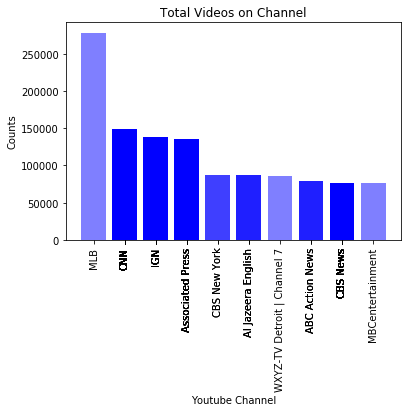

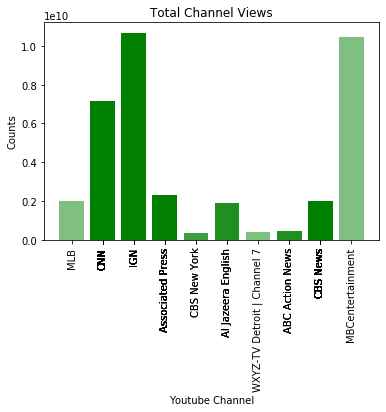

In [7]:
x = top_channels["channel_title"]
y = top_channels["video_count"]

tick_locations = [value for value in x]

plt.bar(x, y, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, top_channels["channel_title"], rotation="vertical")
plt.title("Total Videos on Channel")
plt.xlabel("Youtube Channel")
plt.ylabel("Counts")
plt.show()

x = top_channels["channel_title"]
y = top_channels["view_count"]

tick_locations = [value for value in x]

plt.bar(x, y, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, top_channels["channel_title"], rotation="vertical")
plt.title("Total Channel Views")
plt.xlabel("Youtube Channel")
plt.ylabel("Counts")
plt.show()


